In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import json
import csv
import time
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import sklearn.metrics as metrics
%matplotlib inline

In [2]:
################################################################################
# preprocess dataset, get Index-BussinessId pair for each city
################################################################################
business_df = pd.read_csv(open('./output/business.csv'))

cities = business_df.groupby('state').count()
top10cities = cities.business_id.sort_values().keys()[-10:]
print top10cities

#save top 10 cities to separate csv files with only index and businessid
question_dataframe_file = open('./output/city_cluster/ON_business.csv', 'wb')
writer = csv.writer(question_dataframe_file, delimiter=',')
writer.writerow(['Index', 'BusinessId'])
ON_df = business_df.business_id[business_df['state'] == 'ON']
ON_df.to_csv(question_dataframe_file)
question_dataframe_file.close()
del(ON_df)

question_dataframe_file = open('./output/city_cluster/IL_business.csv', 'wb')
writer = csv.writer(question_dataframe_file, delimiter=',')
writer.writerow(['Index', 'BusinessId'])
IL_df = business_df.business_id[business_df['state'] == 'IL']
IL_df.to_csv(question_dataframe_file)
question_dataframe_file.close()
del(IL_df)

question_dataframe_file = open('./output/city_cluster/BW_business.csv', 'wb')
writer = csv.writer(question_dataframe_file, delimiter=',')
writer.writerow(['Index', 'BusinessId'])
BW_df = business_df.business_id[business_df['state'] == 'BW']
BW_df.to_csv(question_dataframe_file)
question_dataframe_file.close()
del(BW_df)

question_dataframe_file = open('./output/city_cluster/WI_business.csv', 'wb')
writer = csv.writer(question_dataframe_file, delimiter=',')
writer.writerow(['Index', 'BusinessId'])
WI_df = business_df.business_id[business_df['state'] == 'WI']
WI_df.to_csv(question_dataframe_file)
question_dataframe_file.close()
del(WI_df)

question_dataframe_file = open('./output/city_cluster/EDH_business.csv', 'wb')
writer = csv.writer(question_dataframe_file, delimiter=',')
writer.writerow(['Index', 'BusinessId'])
EDH_df = business_df.business_id[business_df['state'] == 'EDH']
EDH_df.to_csv(question_dataframe_file)
question_dataframe_file.close()
del(EDH_df)

question_dataframe_file = open('./output/city_cluster/PA_business.csv', 'wb')
writer = csv.writer(question_dataframe_file, delimiter=',')
writer.writerow(['Index', 'BusinessId'])
PA_df = business_df.business_id[business_df['state'] == 'PA']
PA_df.to_csv(question_dataframe_file)
question_dataframe_file.close()
del(PA_df)

question_dataframe_file = open('./output/city_cluster/QC_business.csv', 'wb')
writer = csv.writer(question_dataframe_file, delimiter=',')
writer.writerow(['Index', 'BusinessId'])
QC_df = business_df.business_id[business_df['state'] == 'QC']
QC_df.to_csv(question_dataframe_file)
question_dataframe_file.close()
del(QC_df)

question_dataframe_file = open('./output/city_cluster/NC_business.csv', 'wb')
writer = csv.writer(question_dataframe_file, delimiter=',')
writer.writerow(['Index', 'BusinessId'])
NC_df = business_df.business_id[business_df['state'] == 'NV']
NC_df.to_csv(question_dataframe_file)
question_dataframe_file.close()
del(NC_df)

question_dataframe_file = open('./output/city_cluster/NV_business.csv', 'wb')
writer = csv.writer(question_dataframe_file, delimiter=',')
writer.writerow(['Index', 'BusinessId'])
NV_df = business_df.business_id[business_df['state'] == 'NV']
NV_df.to_csv(question_dataframe_file)
question_dataframe_file.close()
del(NV_df)

question_dataframe_file = open('./output/city_cluster/AZ_business.csv', 'wb')
writer = csv.writer(question_dataframe_file, delimiter=',')
writer.writerow(['Index', 'BusinessId'])
AZ_df = business_df.business_id[business_df['state'] == 'AZ']
AZ_df.to_csv(question_dataframe_file)
question_dataframe_file.close()
del(AZ_df)

/home/gladius/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (14,19,21,22,23,24,25,26,27,56,57) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index([u'ON', u'IL', u'BW', u'WI', u'EDH', u'PA', u'QC', u'NC', u'NV', u'AZ'], dtype='object', name=u'state')


In [58]:
testing_city = 'ON'
cluster_numbers = 15

In [59]:
################################################################################
# get checkin data and euc_dist ready for cluster
################################################################################
dataframe_dict = {}
euc_dist_dict = {}
X_dict = {}
checkin_dataframe = pd.read_csv('./output/checkin_total.csv')
count = 0
for name in top10cities:
    if name == testing_city:
        city_df = pd.read_csv(open('./output/city_cluster/'+name+'_business.csv', 'r'))
        # filter business within current city from whole dataset
        dataframe_dict[name] = checkin_dataframe[checkin_dataframe['BusinessId'].isin(city_df['BusinessId'].tolist())]
        # calculate euc_dist and save it to dict
#         euc_dist_dict[name] = metrics.euclidean_distances(
#             dataframe_dict[name].drop(dataframe_dict[name].columns[0:2], axis = 1)
#         )
        #drop BusinessId and total in checkin data for each city to test best cluster numbers
        X_dict[name] = dataframe_dict[name].drop(dataframe_dict[name].columns[0:2], axis = 1)
#drop BusinessId and total in checkin data for whole file to test best cluster numbers
# X = checkin_dataframe.drop(checkin_dataframe.columns[0:2], axis = 1)

In [60]:
########################################
# test how many clusters is best => 10
########################################
def evaluate_clusters(X,max_clusters):
    error = np.zeros(max_clusters+1)
    error[0] = 0;
    for k in range(1,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=cluster_numbers, n_init=10)
        kmeans.fit_predict(X)
        error[k] = kmeans.inertia_

    plt.plot(range(1,len(error)),error[1:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Error')

# evaluate_clusters(X, 20)

In [61]:
########################################
# cluster SCRATCH:
#    for each city, cluster by check-in
########################################
import time
start = time.time()
for X in X_dict.keys():
    # for ON only
    if X == testing_city:
        kmeans = KMeans(init='k-means++', n_clusters=cluster_numbers, n_init=10)
        kmeans.fit_predict(X_dict[X])
        centroids = kmeans.cluster_centers_
        labels = kmeans.labels_
        error = kmeans.inertia_
        print X + '==========================='
        print "The total error of the clustering is: ", error
        print '\nCluster labels'
        print labels
        print '\n Cluster Centroids'
        print centroids
print time.time() - start

ON===========================
The total error of the clustering is:  24.3075861721

Cluster labels
[ 5  3  4 10  1  4  2  2  1  5  1  8  4  0 12  5  6  6 10  2  3  7  0 10  1
  1  5  4  5  8  9 13  3  6  1  2  3  9 10  8 13 14  1 10  6  0  8  4  9  5
 14  8  8  2  3  1  7  3  1  1  8  2  6  2  1  9  1  0  9 10  0  4 10 13 13
 14  1  8  4  8  1  4 11  6 14 10  9  4  8  2  9  8  8  8  1  2  1  8  1  6
  4  5 11  4  0 13  8  3  9  4  4  0 11  4 13 10  5 13  1  1  1  1  1  0 14
  2  4  8  5 10 13  0  4  8 14 13  6 13  2 14  4  4  4  6 13  1  3  9  1  1
  1  1  4  9  4  0  1 13  0  1  0  9 10  2  1 14  4  0  7 13  4  0 11  4  5
  3  1  2  4 11  8  1  1  7  4 14  1  4  4  7  8 10  2  1  7  7  8  4  6 13
  5  1 13  9  0  4 10  4  2 10  1  0  4  4 14 10  2 14  1  4  1  9  0  8  4
  8  5 14 10  9  0  8  4  2  0  1 10  4  2  6  0  4  6  6  8  0  1  1  8  5
  4  4  4  2  2 14  2  7  4  4  2  6  2 14 11  4  2 13  1  1 14  4  1 10  8
  8  2  4  2  2  8  1 14  2  9  4  2 13  0  4  4 13  1 10  2 10  

In [62]:
########################################
# plot specified business from checkin data frame
########################################
def plot_csv(target_business_list):
    target_df = pd.read_csv('./output/checkin_total.csv')
    
    #get dataframe
    df = target_df
    clean_df = df.drop(df.columns[0:2], axis = 1)
    df_dict = {}
    df_dict['hours'] = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10',
          '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19','19-20', '20-21','21-22',
          '22-23', '23-0']
    if target_business_list != []:
        df = df[df.BusinessId.isin(target_business_list)]
        for i in range(len(df)):
            df_dict[df.BusinessId.tolist()[i]] = np.array(clean_df.iloc[i].tolist())
    else:
        print 'list is empty'
        return
    plot_df = pd.DataFrame(df_dict)
#     plot_df.plot(x = 'hours')
    
    #plot sum
    sum_dict = {}
    sum_plot = np.zeros(24)
    for i in df_dict.keys():
        if i != 'hours':
            sum_plot = np.add(sum_plot, df_dict[i])
    sum_dict['hours'] = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10',
          '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19','19-20', '20-21','21-22',
          '22-23', '23-0']
    sum_dict['avg'] = np.divide(sum_plot, len(df_dict))
#     sum_dict['sum'] = sum_plot#np.divide(sum_plot, len(df_dict))
    sum_df = pd.DataFrame(sum_dict)
    sum_df.plot(x = 'hours')

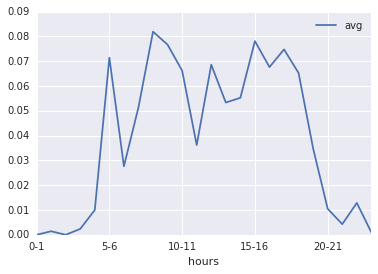

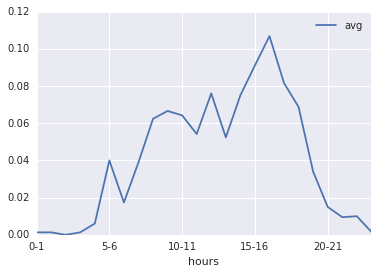

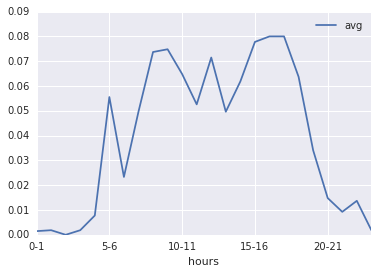

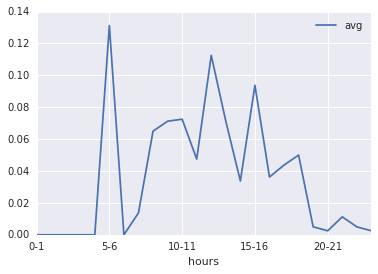

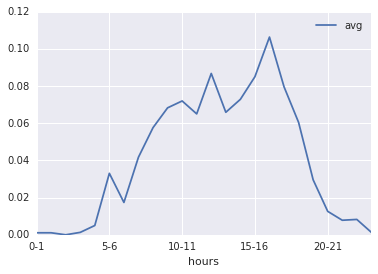

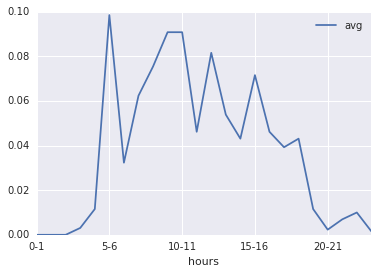

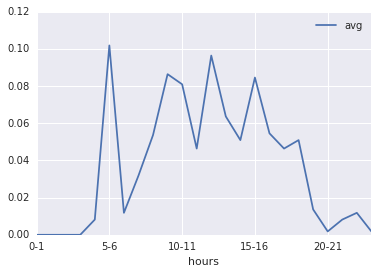

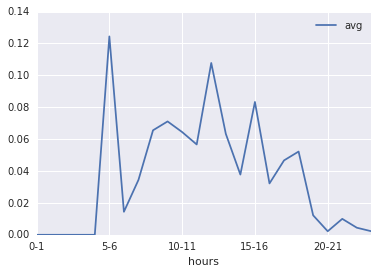

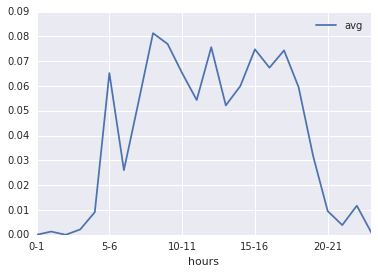

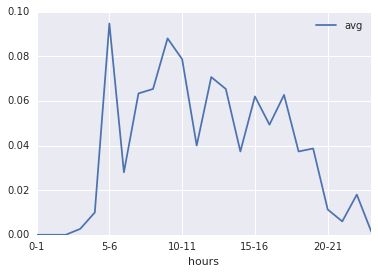

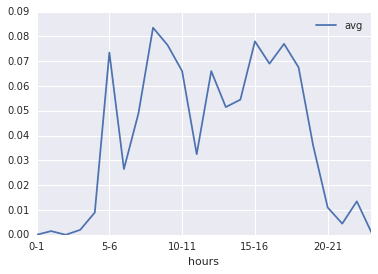

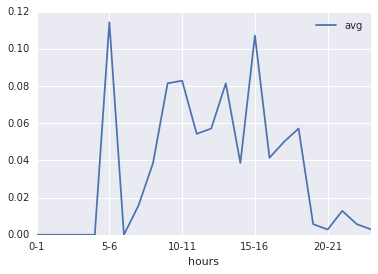

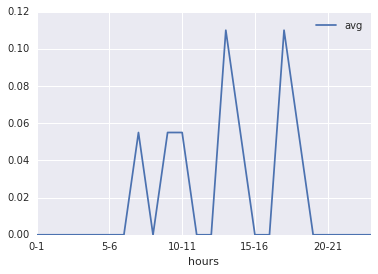

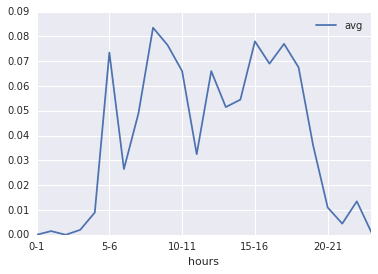

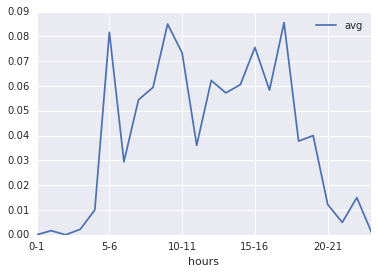

In [63]:
########################################
# for each cluster, plot average checkin trend
########################################
#read index-bussiness pair
ON_df = pd.read_csv(open('./output/city_cluster/' + testing_city +'_business.csv', 'r'))
#read checkin data
checkin_df = pd.read_csv('./output/checkin.csv')

#create a dict where key is cluster number and value is a list of BusinessId
temp_list = {}
curr_group = 0
for idx in labels.argsort():
    if labels[idx] == curr_group:
        if str(curr_group) not in temp_list.keys():
            temp_list[str(curr_group)] = [ON_df.BusinessId[idx]]
        else:
            temp_list[str(curr_group)].append(ON_df.BusinessId[idx])
    else:
        curr_group += 1
        if str(curr_group) not in temp_list.keys():
            temp_list[str(curr_group)] = [ON_df.BusinessId[idx]]
        else:
            temp_list[str(curr_group)].append(ON_df.BusinessId[idx])

for i in range(0, len(temp_list)):
    plot_list = []
    for bid in temp_list[str(i)]:
        plot_list.append(bid)
    plot_csv(plot_list)